In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from kneed import KneeLocator

In [186]:
df = pd.read_csv("smartcart_customers.csv") 

In [187]:
# df.info()
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Feature Engeneearing

In [188]:
# 
df = df.drop(columns = "ID")
df.head()

df["Income"] = df["Income"].fillna(df["Income"].median())


In [189]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')

In [190]:
# Age
df["Age"] = 2026  - df["Year_Birth"]



In [191]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)
refernce_date = df["Dt_Customer"].max()

df["Customer_Tenure_Days"] = (refernce_date - df["Dt_Customer"]).dt.days

In [192]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_Tenure_Days'],
      dtype='object')

In [193]:
# Spending

df["Total_Spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"] 
df["Total_Childeren"] = df["Kidhome"] + df["Teenhome"]

In [194]:
# df["Education"].value_counts()

# Undergraduate , Gradute , Postgraduate

df["Education"] = df["Education"].replace({
    "Basic" : "Undergraduate",
    "2n Cycle" : "Undergraduate",
    "Graduation" : "Graduate",
    "Master" : "Postgraduate",
    "PhD" : "Postgraduate"
})

In [195]:
df["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [196]:
df["Marital_Status"].value_counts()


df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner", "Together": "Partner",
    "Single": "Alone", "Divorced": "Alone",
    "Widow": "Alone", "Absurd": "Alone", "YOLO": "Alone"
})

In [197]:
df["Living_With"].value_counts()

Living_With
Partner    1444
Alone       796
Name: count, dtype: int64

# DropColumn

In [198]:
cols = ["Year_Birth", "Marital_Status", "Kidhome", "Teenhome", "Dt_Customer"]
spending_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

cols_to_drop = cols + spending_cols

dfc = df.drop(columns=cols_to_drop)
dfc

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Childeren,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,2,9,3,4,5,0,0,59,381,1341,1,Partner
2236,Postgraduate,64014.0,56,7,8,2,5,7,0,0,80,19,444,3,Partner
2237,Graduate,56981.0,91,1,2,3,13,6,0,0,45,155,1241,0,Alone
2238,Postgraduate,69245.0,8,2,6,5,10,3,0,0,70,156,843,1,Partner


In [199]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2240 non-null   object 
 1   Income                2240 non-null   float64
 2   Recency               2240 non-null   int64  
 3   NumDealsPurchases     2240 non-null   int64  
 4   NumWebPurchases       2240 non-null   int64  
 5   NumCatalogPurchases   2240 non-null   int64  
 6   NumStorePurchases     2240 non-null   int64  
 7   NumWebVisitsMonth     2240 non-null   int64  
 8   Complain              2240 non-null   int64  
 9   Response              2240 non-null   int64  
 10  Age                   2240 non-null   int64  
 11  Customer_Tenure_Days  2240 non-null   int64  
 12  Total_Spending        2240 non-null   int64  
 13  Total_Childeren       2240 non-null   int64  
 14  Living_With           2240 non-null   object 
dtypes: float64(1), int64(

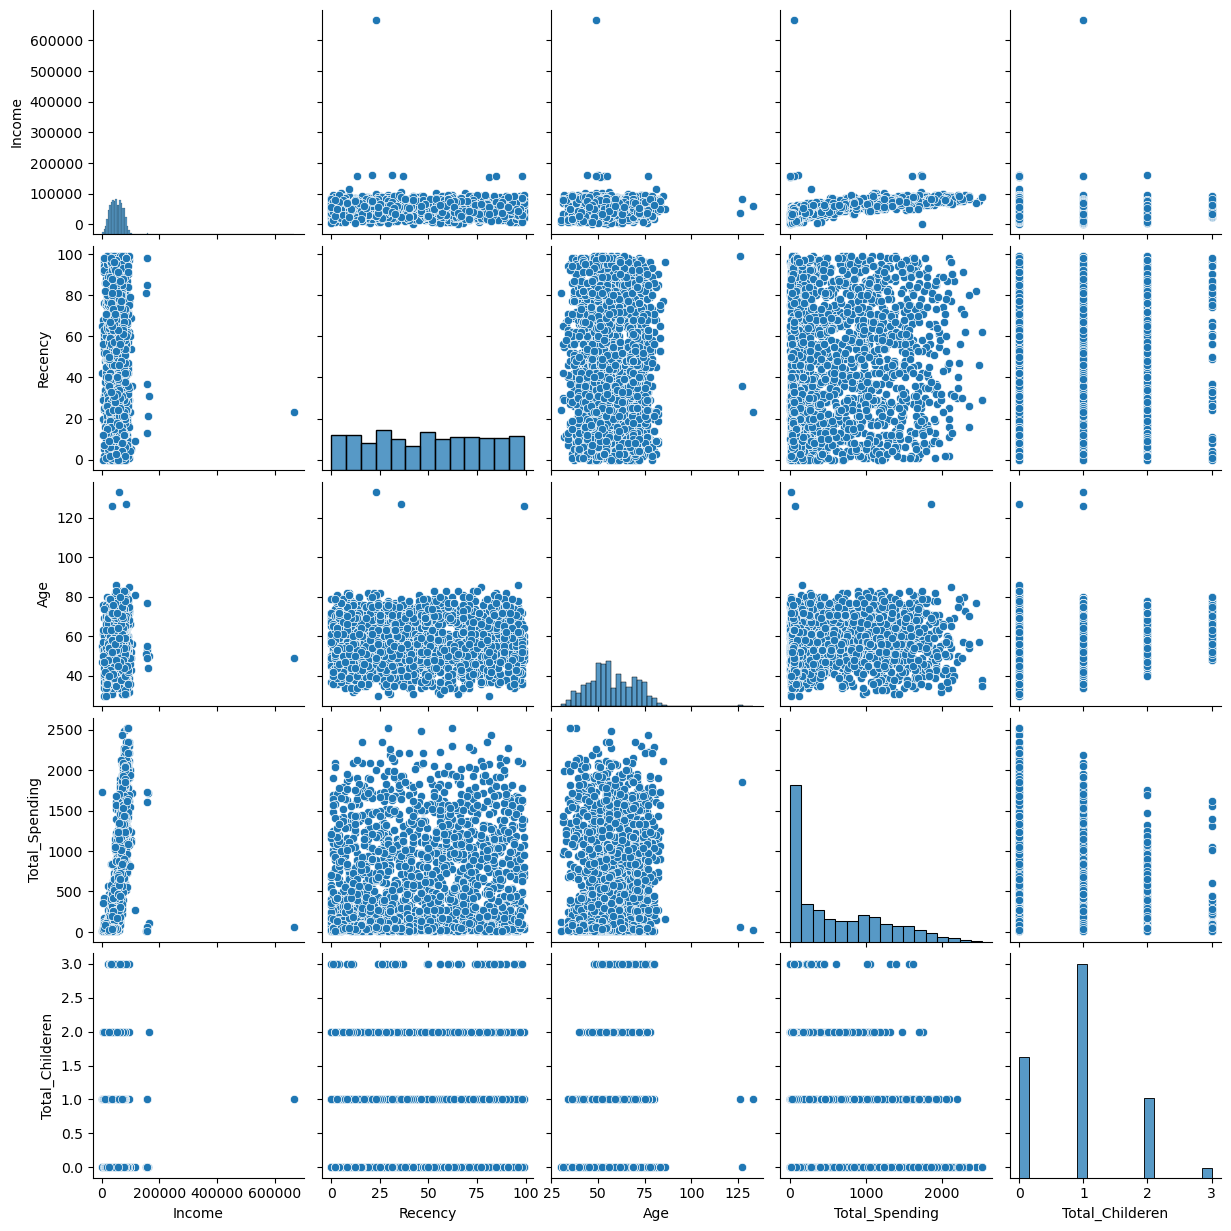

In [200]:
cols = ["Income","Recency" ,"Age", "Total_Spending" , "Total_Childeren"]

# relative pair plot

sns.pairplot(df_cleaned[cols])

In [201]:
# Remove outliers

print("data size with outliers:", len(df_cleaned))

df_cleaned = df_cleaned[ (df_cleaned["Age"] < 90) ]
df_cleaned = df_cleaned[ (df_cleaned["Income"] < 600_000) ]

print("data size without outliers:", len(df_cleaned))

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Childeren,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,2,9,3,4,5,0,0,59,381,1341,1,Partner
2236,Postgraduate,64014.0,56,7,8,2,5,7,0,0,80,19,444,3,Partner
2237,Graduate,56981.0,91,1,2,3,13,6,0,0,45,155,1241,0,Alone
2238,Postgraduate,69245.0,8,2,6,5,10,3,0,0,70,156,843,1,Partner


In [202]:
# Remove outliers

print("data size with outliers:", len(df_cleaned))

df_cleaned = df_cleaned[ (df_cleaned["Age"] < 90) ]
df_cleaned = df_cleaned[ (df_cleaned["Income"] < 600_000) ]

print("data size without outliers:", len(df_cleaned))

data size with outliers: 2240
data size without outliers: 2236


In [206]:
corr = dfc.corr(numeric_only = True)


<Axes: >

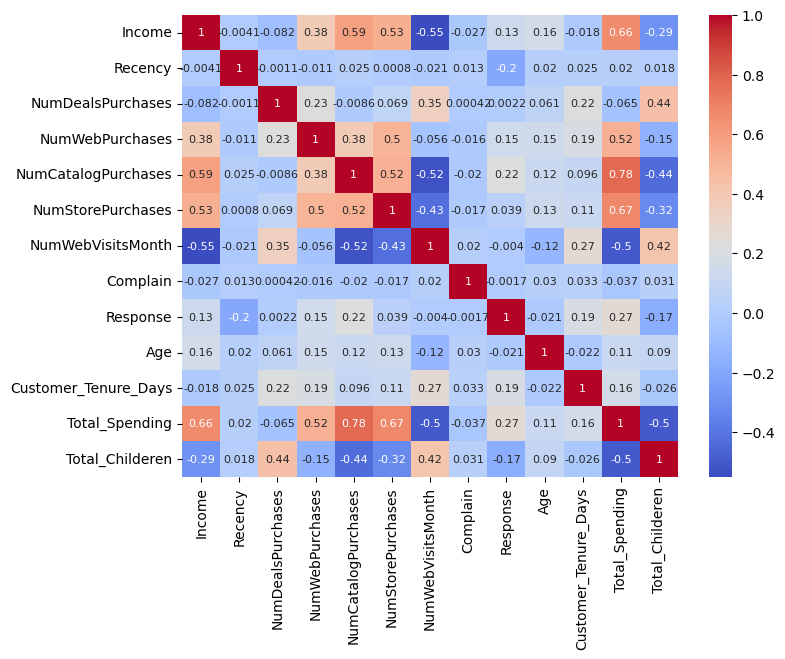

In [226]:
plt.figure(figsize = (8,6))
sns.heatmap(
    corr ,
    annot = True ,
    annot_kws = {"size":8},
    cmap = "coolwarm" 
)

In [231]:
dfc.shape
dfc.sample(10)

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Childeren,Living_With
1213,Graduate,74918.0,78,1,5,9,6,3,0,0,57,474,2047,0,Partner
2073,Postgraduate,42000.0,23,2,5,2,11,5,0,1,39,535,653,0,Alone
265,Postgraduate,38179.0,30,4,3,1,3,7,0,0,60,472,90,2,Partner
242,Graduate,22804.0,75,1,2,0,2,9,0,0,55,333,26,1,Alone
695,Postgraduate,61923.0,94,1,2,1,4,3,0,0,65,338,126,2,Partner
1135,Undergraduate,49669.0,97,2,5,1,6,6,0,0,52,36,326,1,Partner
1709,Postgraduate,54222.0,98,1,3,3,5,3,0,0,53,120,264,1,Partner
1675,Undergraduate,20193.0,18,1,1,1,4,4,0,0,35,578,82,0,Partner
51,Postgraduate,79143.0,2,1,6,9,13,3,0,0,62,687,1693,0,Partner
1833,Graduate,48186.0,39,3,4,1,4,7,0,0,52,101,219,1,Partner


In [240]:
ohe = OneHotEncoder()

cat_cols = ["Education", "Living_With"]
enc = ohe.fit_transform(dfc[cat_cols])

pd.DataFrame(enc_cols.toarray() , columns = ohe.get_feature_names_out(cat_cols))

,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Living_With_Alone,Living_With_Partner
0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
2235,1.0,0.0,0.0,0.0,1.0
2236,0.0,1.0,0.0,0.0,1.0
2237,1.0,0.0,0.0,1.0,0.0
2238,0.0,1.0,0.0,0.0,1.0


In [245]:
ohe = OneHotEncoder()

cat_cols = ["Education", "Living_With"]

enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

In [246]:
enc_df = pd.DataFrame(enc_cols.toarray(), columns=ohe.get_feature_names_out(cat_cols), index=df_cleaned.index)

In [247]:
df_encoded = pd.concat([df_cleaned.drop(columns=cat_cols),enc_df], axis=1)

In [255]:
X = df_encoded
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

X_scaled.shape

(2236, 18)

In [263]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)

In [265]:
pca.explained_variance_ratio_


array([0.23163158, 0.11385454, 0.10405815])

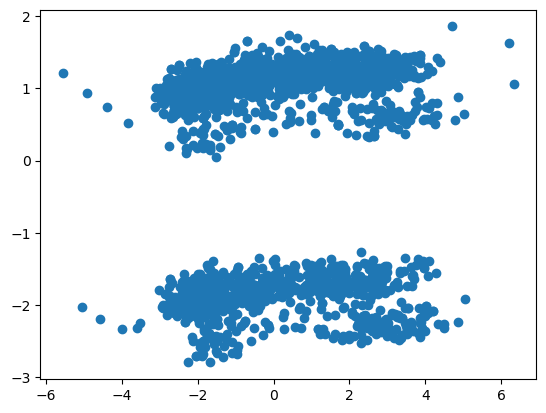

In [279]:


plt.scatter(x = X_pca[:, 0],y = X_pca[:, 1],)

# plt.set_xlabel("PCA1")
# plt.set_ylabel("PCA2")
# plt.set_title("2d projection")

Text(0.5, 0.92, '3d projection')

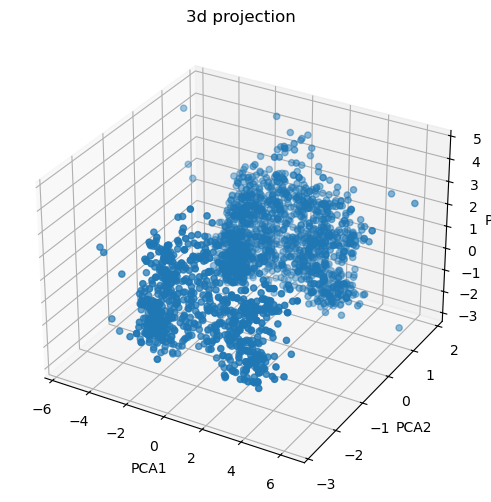

In [273]:
# plot
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

In [284]:

wcss  = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state = 42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

knee = KneeLocator(range(1,11) , wcss , curve = "convex",direction = "decreasing")
optimal_k = knee.elbow
print("K = ",optimal_k)

K =  4


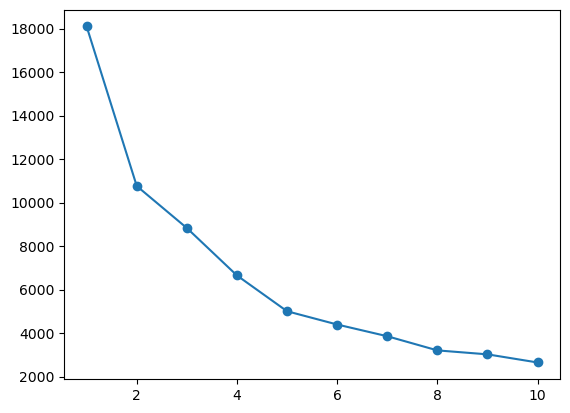

In [311]:
plt.plot(range(1, 11), wcss, marker='o')
# plt.xlabel("K")
# plt.ylabel("WCSS")



# silhouette Score

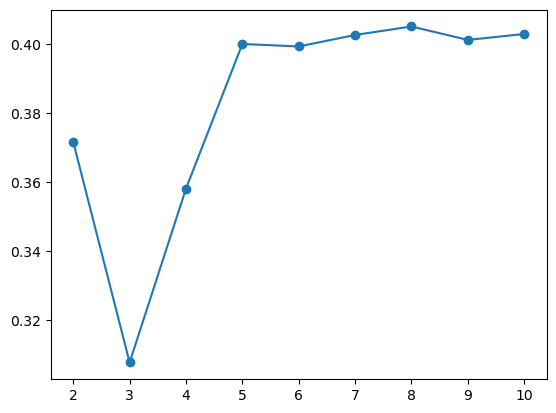

In [309]:
from sklearn.metrics import silhouette_score

score = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k ,  random_state = 42)
    labels  = kmeans.fit_predict(X_pca)
    n = silhouette_score(X_pca, labels)
    score.append(n)

plt.plot(range(2, 11), score, marker='o')

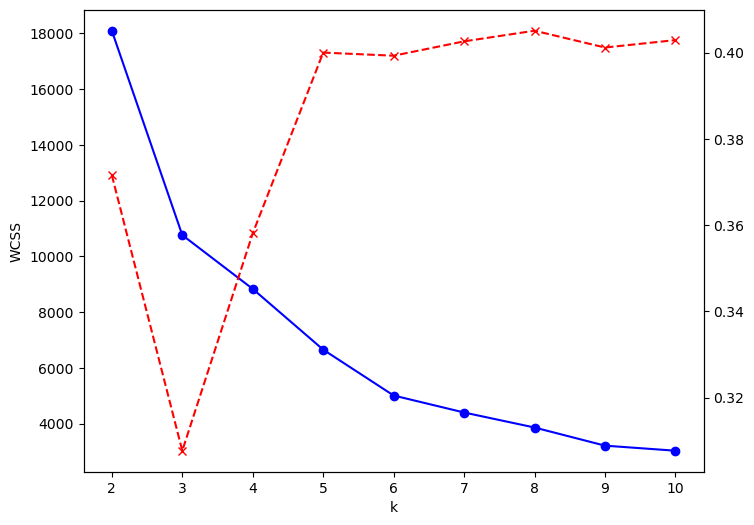

In [314]:
k_range = range(2,11)

# plt.plot(range(2, 11), score, marker='o')
fig,ax1 = plt.subplots(figsize = (8,6))
ax1.plot(k_range,wcss[:len(k_range)] ,marker = 'o', color = "blue" )
ax1.set_xlabel("k")
ax1.set_ylabel("WCSS")
ax2 = ax1.twinx()
ax2.plot(k_range, score[:len(k_range)], marker = 'x' ,color = 'red', linestyle = '--' )

In [316]:
# K_means

kmeans = KMeans(n_clusters = 4 , random_state= 42)
kmeans_labels = kmeans.fit_predict(X_pca)

Text(0.5, 0.92, '3d projection')

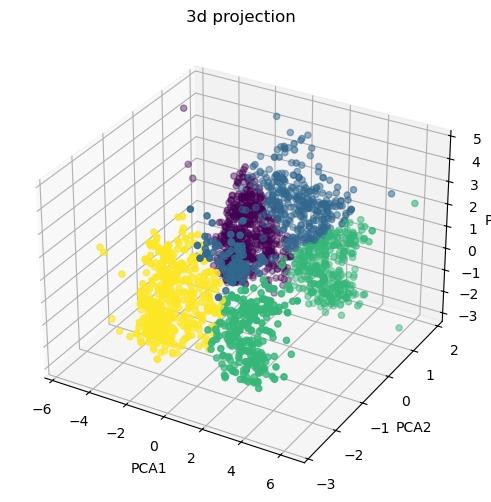

In [317]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c= kmeans_labels)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

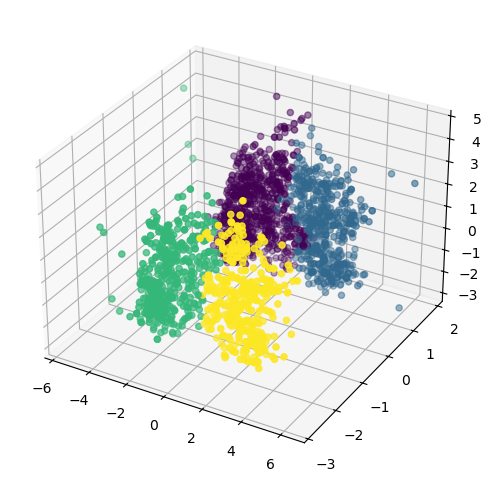

In [321]:
agg_clf = AgglomerativeClustering(n_clusters=4, linkage="ward")
labels_agg = agg_clf.fit_predict(X_pca)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_agg)

# characterization of cluster

In [338]:
# df_cleaned = df_cleaned.drop("label", axis  =1)
X["cluster"] = labels_agg


<Axes: xlabel='cluster', ylabel='count'>

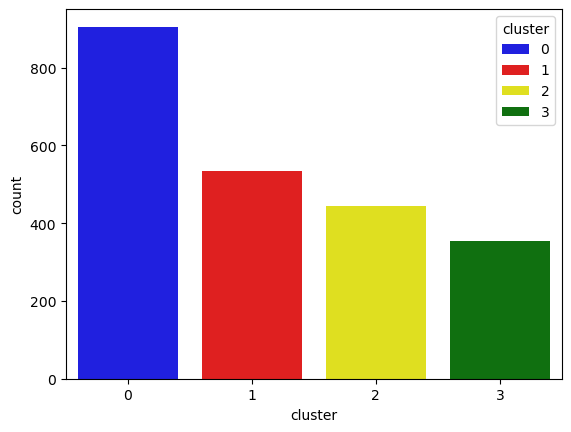

In [339]:
pal = ["blue","red","yellow","green"]
sns.countplot(x = X["cluster"],palette = pal, hue = X["cluster"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

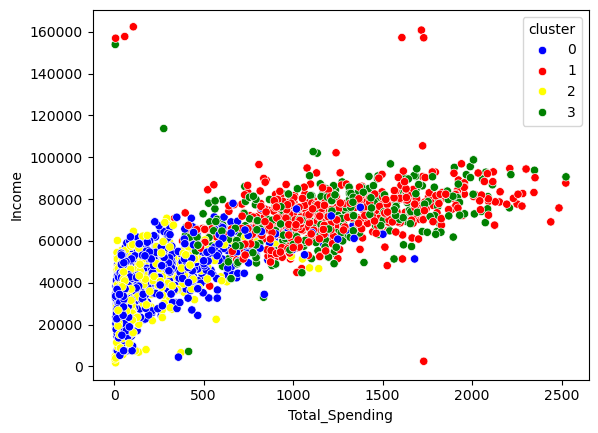

In [337]:
sns.scatterplot(x = df_cleaned["Total_Spending"] , y = df_cleaned["Income"], hue = df_cleaned["cluster"],palette = pal)

In [336]:
df_cleaned.columns

Index(['Education', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Customer_Tenure_Days', 'Total_Spending', 'Total_Childeren',
       'Living_With', 'cluster'],
      dtype='object')

In [343]:
cluster_summary = X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_Tenure_Days  Total_Spending  \
cluster         